In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [7]:
def load_data_classification():
    digits=datasets.load_digits() # 使用 scikit-learn 自带的 digits 数据集
    return train_test_split(digits.data,digits.target,
                            test_size=0.25,random_state=0,stratify=digits.target)

## Adam Boost

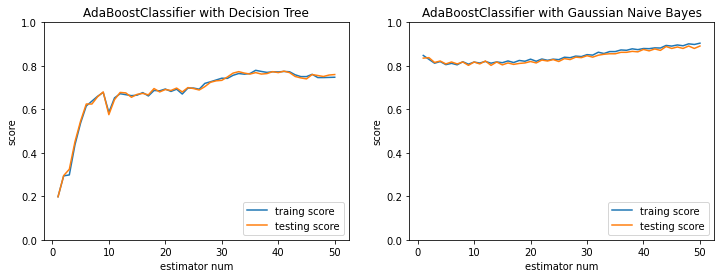

In [26]:
from sklearn import ensemble

def test_AdaBoostClassifier_base_classifier(*data):
    from sklearn.naive_bayes import GaussianNB
    X_train,X_test,y_train,y_test = data
    fig=plt.figure(figsize=(12, 4))
    
    ########### 默认的个体分类器 #############
    ax=fig.add_subplot(1,2,1)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    
    ####### Gaussian Naive Bayes 个体分类器 ########
    ax=fig.add_subplot(1,2,2)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.show()
    
X_train,X_test,y_train,y_test=load_data_classification()
test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test)

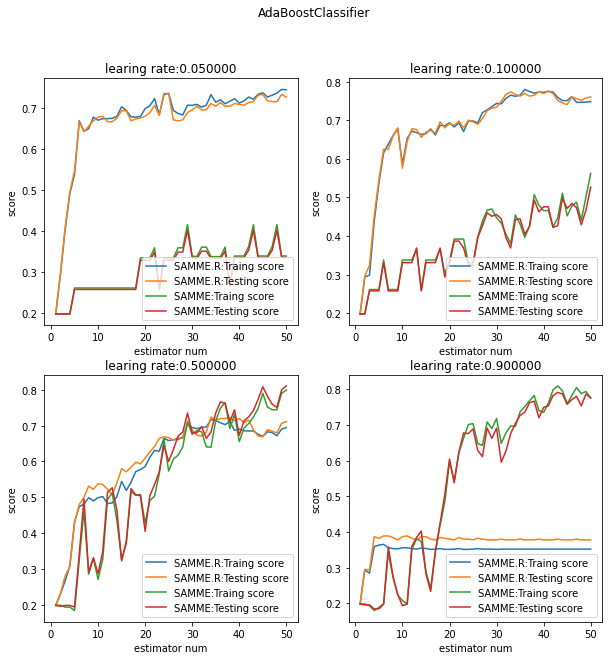

In [17]:
def test_AdaBoostClassifier_algorithm(*data):
    X_train,X_test,y_train,y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure(figsize=(10, 10))
    learning_rates=[0.05,0.1,0.5,0.9]
    for i,learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i ,algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,
                                            algorithm=algorithm)
            clf.fit(X_train,y_train)
            ## 绘图
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot(list(X),list(clf.staged_score(X_train,y_train)),
                    label="%s:Traing score"%algorithms[i])
            ax.plot(list(X),list(clf.staged_score(X_test,y_test)),
                    label="%s:Testing score"%algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_title("learing rate:%f"%learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.show()
    
X_train,X_test,y_train,y_test=load_data_classification()
test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test)

## AdaBoost Regressor

In [21]:
def load_data_regression():
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自带的一个糖尿病病人的数据集
    return train_test_split(diabetes.data,diabetes.target,
                            test_size=0.25,random_state=0)

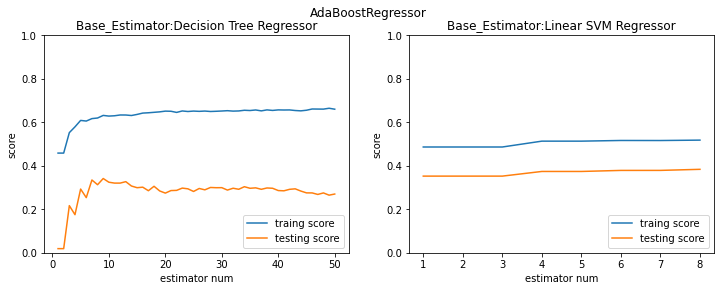

In [32]:
def test_AdaBoostRegressor_base_regr(*data):
    '''
    测试 AdaBoostRegressor 的预测性能随基础回归器数量的和基础回归器类型的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    from sklearn.svm import  LinearSVR
    X_train,X_test,y_train,y_test=data
    fig=plt.figure(figsize=(12, 4))
    regrs=[ensemble.AdaBoostRegressor(), # 基础回归器为默认类型
           ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01,C=100))] # 基础回归器为 LinearSVR
    labels=["Decision Tree Regressor","Linear SVM Regressor"]
    
    for i ,regr in enumerate(regrs):
        ax=fig.add_subplot(1,2,i+1)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="traing score")
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="testing score")
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(0,1)
        ax.set_title("Base_Estimator:%s"%labels[i])
    plt.suptitle("AdaBoostRegressor")
    plt.show()

X_train,X_test,y_train,y_test = load_data_regression()
test_AdaBoostRegressor_base_regr(X_train,X_test,y_train,y_test)

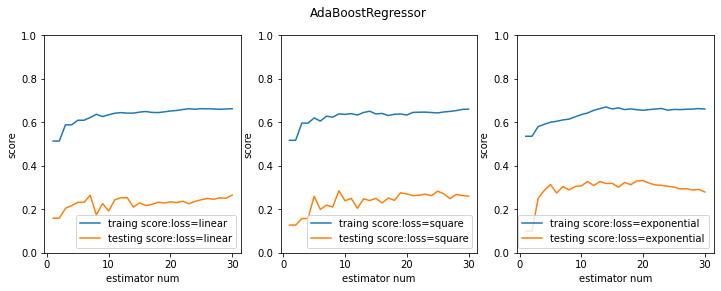

In [33]:
def test_AdaBoostRegressor_loss(*data):
    '''
    测试 AdaBoostRegressor 的预测性能随损失函数类型的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    losses=['linear','square','exponential']
    fig=plt.figure(figsize=(12, 4))
    
    for i ,loss in enumerate(losses):
        ax=fig.add_subplot(1,3,i+1)
        regr=ensemble.AdaBoostRegressor(loss=loss,n_estimators=30)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),
                label="traing score:loss=%s"%loss)
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),
                label="testing score:loss=%s"%loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(0,1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()
    
X_train,X_test,y_train,y_test = load_data_regression()
test_AdaBoostRegressor_loss(X_train,X_test,y_train,y_test)